In [1]:
import rlssm
import pandas as pd
import os

#### Import the grouped data

In [2]:
data = pd.read_csv('../../data/data_experiment.csv', index_col=0)

data = data[data.participant == 7].reset_index(drop=True)

data['feedback_type'] = 0 # complete feedback

data

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,feedback_type
0,7,1,1,56,40,4,2,1,2.094658,0,0
1,7,1,2,54,40,4,2,2,1.739800,0,0
2,7,1,3,56,50,4,3,2,1.127668,1,0
3,7,1,4,50,46,3,1,1,1.767624,0,0
4,7,1,5,54,30,3,1,2,1.732556,1,0
...,...,...,...,...,...,...,...,...,...,...,...
235,7,3,76,52,35,3,1,38,1.328993,1,0
236,7,3,77,62,49,4,3,37,1.215041,1,0
237,7,3,78,49,42,4,2,39,1.117462,1,0
238,7,3,79,57,52,4,3,39,1.285171,1,0


#### Initialise the model

In [3]:
model = rlssm.RLRDModel_2A(1,
                           separate_learning_rates=True,
                           nonlinear_mapping=True)

INFO:cmdstanpy:compiling stan file /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/RLRDM_2A/RLRDM_2A_2lr_nonlin.stan to exe file /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/RLRDM_2A/RLRDM_2A_2lr_nonlin
INFO:cmdstanpy:compiled model executable: /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/RLRDM_2A/RLRDM_2A_2lr_nonlin
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/RLRDM_2A/RLRDM_2A_2lr_nonlin.hpp /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/RLRDM_2A/RLRDM_2A_2lr_nonlin.stan
Warning in '/Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/RLRDM_2A/RLRDM_2A_2lr_nonlin.stan', line 52, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/U

In [4]:
model.family, model.model_label, model.hierarchical_levels

('RLRDM_2A', 'RLRDM_2A_2lr_nonlin', 1)

### Fit

In [5]:
# sampling parameters
n_iter = 700
n_chains = 2
n_thin = 5

# learning parameters
K = 4 # n options
initial_value_learning = 17.5 # intitial value (Q0)

# bayesian model
alpha_priors = None
drift_scaling_priors = None
threshold_priors = None
ndt_priors = None

In [6]:
model_fit = model.fit(data,
                      K,
                      initial_value_learning,
                      alpha_priors=alpha_priors,
                      drift_scaling_priors=drift_scaling_priors,
                      threshold_priors=threshold_priors,
                      ndt_priors=ndt_priors,
                      iter_warmup = n_iter,
                      iter_sampling = n_iter,
                      chains = n_chains,
                      include_last_values = False,
                      print_diagnostics = False)

Fitting the model using the priors:
alpha_pos_priors {'mu': 0, 'sd': 1}
alpha_neg_priors {'mu': 0, 'sd': 1}
ndt_priors {'mu': 0, 'sd': 5}
threshold_priors {'mu': 0, 'sd': 5}
slop_priors {'mu': -1.5, 'sd': 1}
drift_asym_priors {'mu': 0, 'sd': 1}
drift_scaling_priors {'mu': 2, 'sd': 1}


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


#### get Rhat

In [7]:
model_fit.rhat.describe()

,rhat
count,1462.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [8]:
model_fit.rhat.head()

,rhat,variable
name,,
lp__,1.0,lp__
alpha_pos,1.0,alpha_pos
alpha_neg,1.0,alpha_neg
ndt,1.0,ndt
threshold,1.0,threshold


#### get wAIC

In [9]:
model_fit.waic

{'lppd': -99.83441948250966,
 'p_waic': 10.91230897415803,
 'waic': 221.49345691333536,
 'waic_se': 36.00432442007104}

### Posteriors

In [10]:
model_fit.samples

,transf_alpha_pos,transf_alpha_neg,transf_ndt,transf_threshold,transf_slop,transf_drift_asym,transf_drift_scaling
0,0.334698,0.037470,0.678051,1.80400,1.093920,0.515064,2.31127
1,0.118890,0.296461,0.667035,1.86100,1.678910,0.720902,2.07537
2,0.148345,0.225614,0.669720,1.84475,0.950398,0.840480,2.18443
3,0.132602,0.058500,0.650376,1.88814,1.320440,0.579173,2.39745
4,0.312019,0.128393,0.654530,1.89517,1.093730,0.736996,2.12980
...,...,...,...,...,...,...,...
1395,0.238498,0.150038,0.688004,1.62754,1.266270,0.338012,2.16979
1396,0.230580,0.180469,0.718414,1.74264,1.663090,1.088080,1.87040
1397,0.157111,0.148222,0.682796,1.57947,1.521680,0.663448,1.78615
1398,0.166676,0.210989,0.660914,1.69417,0.797971,0.486096,2.11299


In [11]:
model_fit.trial_samples

{'drift_cor_t': array([[1.15564 , 2.69313 , 2.84663 , ..., 2.90039 , 2.86943 , 2.86966 ],
        [1.03768 , 1.94321 , 2.37505 , ..., 2.85092 , 2.99274 , 3.05999 ],
        [1.09222 , 1.93751 , 2.59674 , ..., 3.08544 , 2.89513 , 2.9882  ],
        ...,
        [0.893077, 1.8333  , 2.14495 , ..., 2.50673 , 2.65225 , 2.70371 ],
        [1.05649 , 1.75464 , 2.36609 , ..., 2.62939 , 2.27308 , 2.34357 ],
        [1.07678 , 1.91396 , 2.50641 , ..., 2.83323 , 2.57394 , 2.66023 ]]),
 'drift_inc_t': array([[1.15564e+00, 1.43939e-01, 3.28063e-05, ..., 6.72340e-04,
         2.98832e-01, 2.93608e-01],
        [1.03768e+00, 3.93566e-01, 2.10514e-03, ..., 7.96157e-06,
         2.07373e-01, 1.76814e-01],
        [1.09222e+00, 6.27199e-01, 1.96408e-02, ..., 1.97359e-03,
         6.10039e-01, 5.57638e-01],
        ...,
        [8.93077e-01, 2.70774e-01, 5.64776e-04, ..., 2.17175e-05,
         1.89409e-01, 1.60790e-01],
        [1.05649e+00, 6.05465e-01, 2.47329e-02, ..., 5.22770e-03,
         6.04236e-

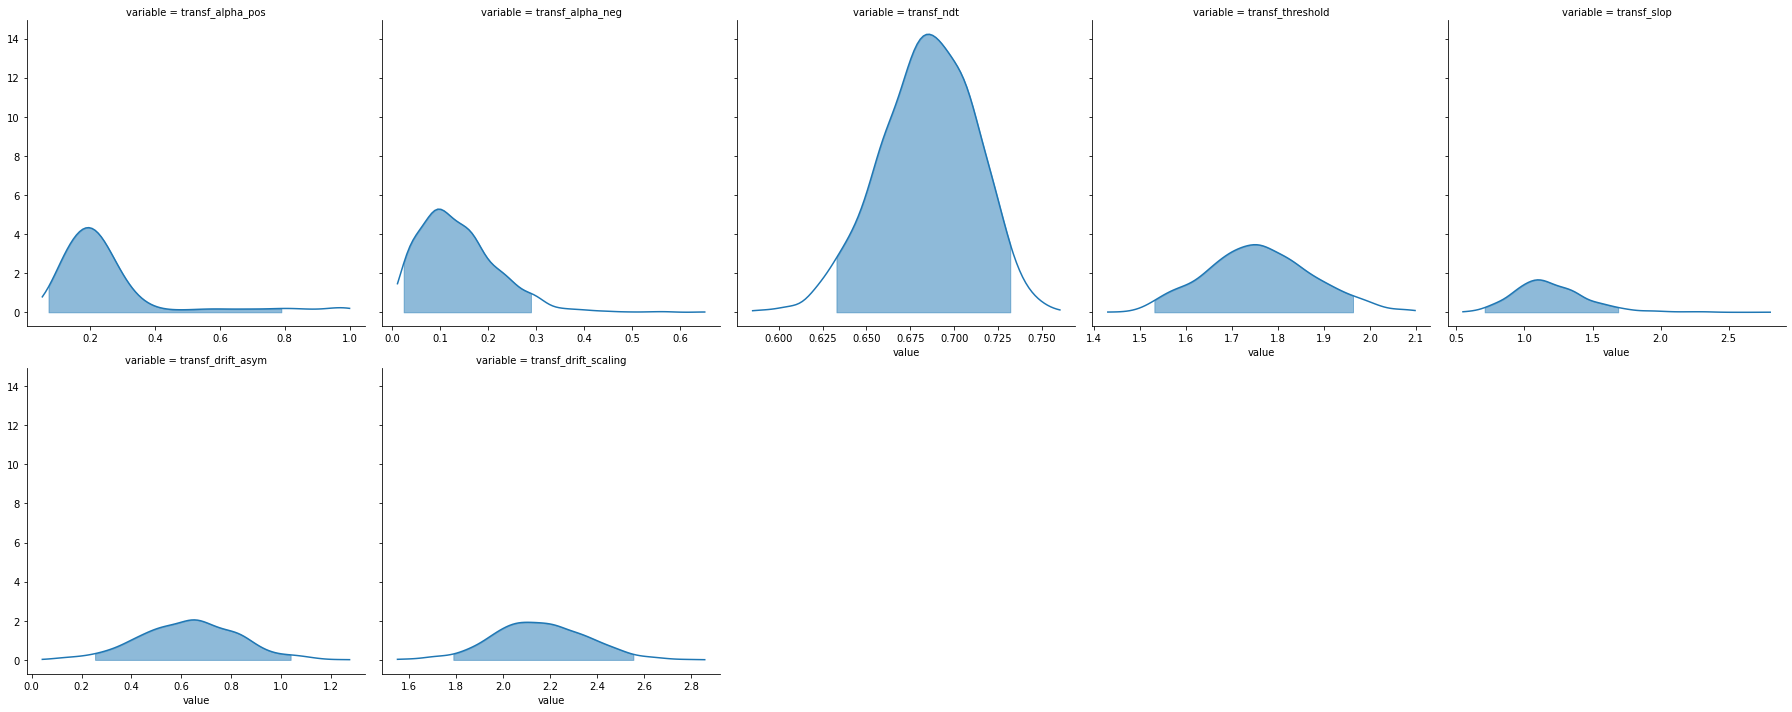

In [12]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

### Posterior predictives

In [13]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.145051  1.196051  1.247051  1.770051  1.406051  1.107051   
2         0.966035  1.251035  1.153035  1.481035  1.778035  1.599035   
3         1.261720  1.679720  1.208720  1.615720  1.270720  1.027720   
4         1.550376  1.962376  1.603376  1.417376  1.192376  1.556376   
5         1.618530  1.170530  1.014530  2.223530  0.870530  1.342530   
...            ...       ...       ...       ...       ...       ...   
96        1.178872  1.270872  0.936872  2.045872  1.409872  1.414872   
97        3.095537  1.456537  1.014537  1.181537  1.613537  1.180537   
98        1.682514  1.698514  1.027514  1.741514  1.663514  1.160514   
99        2.414849  1.614849  0.981849  1.109849  1.162849  1.015849   
100       1.201450  1.677450  1.256450  2.215450  1.323450  1.209450   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      231  232  233  234   
sample                                            ...                           
1         1.111051  1.190051  1.536051  1.375051  ...      1.0  1.0  1.0  1.0   
2         1.588035  2.493035  1.709035  1.311035  ...      1.0  1.0  1.0  1.0   
3         1.390720  1.158720  1.257720  1.658720  ...      1.0  1.0  1.0  1.0   
4         1.168376  1.537376  1.557376  1.620376  ...      1.0  1.0  1.0  1.0   
5         2.025530  1.806530  1.219530  1.496530  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.512872  1.400872  1.294872  1.797872  ...      1.0  1.0  1.0  1.0   
97        1.087537  1.726537  0.962537  1.994537  ...      1.0  1.0  1.0  1.0   
98        1.135514  1.286514  2.775514  1.784514  ...      1.0  1.0  1.0  1.0   
99        1.462849  1.179849  1.689849  1.523849  ...      1.0  1.0  1.0  1.0   
100       1.786450  1.706450  1.254450  1.724450  ...      1.0  1.0  1.0  1.0   

variable                                
trial     235  236  237  238  239  240  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  1.0  
2         1.0  1.0  1.0  1.0  1.0  1.0  
3         1.0  1.0  1.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  0.0  1.0  1.0  1.0  1.0  
97        1.0  1.0  1.0  1.0  1.0  1.0  
98        1.0  1.0  0.0  1.0  1.0  1.0  
99        1.0  1.0  1.0  1.0  1.0  1.0  
100       1.0  0.0  1.0  1.0  1.0  1.0  

[100 rows x 480 columns]

In [14]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.916667,1.404847,1.172703,1.074351,1.250351,1.332051,1.563951,1.981051,1.029551,1.192451,1.321051,1.508251,1.889451
2,0.925000,1.417577,1.100011,1.129135,1.285835,1.448035,1.740235,1.993735,1.049135,1.183435,1.318035,1.478735,1.951135
3,0.920833,1.386403,1.255320,1.203720,1.287520,1.359720,1.484920,1.743120,1.057720,1.194720,1.317720,1.491720,1.791720
4,0.904167,1.430555,2.045780,1.149376,1.361776,1.506376,1.772976,2.128176,1.030776,1.169976,1.298376,1.478176,1.906176
5,0.904167,1.417568,1.535572,1.143730,1.324530,1.483530,1.714130,2.208130,1.039130,1.171130,1.304530,1.482730,1.896330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.904167,1.427635,2.874629,1.140872,1.364472,1.537872,1.687472,2.072272,1.020072,1.172072,1.340872,1.522472,1.902272
97,0.904167,1.375737,1.809878,1.163737,1.253537,1.393537,1.564337,2.287737,1.033937,1.162137,1.297537,1.447937,1.744537
98,0.900000,1.409026,0.898654,1.123014,1.243214,1.376014,1.672414,2.119614,1.057014,1.238514,1.352514,1.495014,1.795014


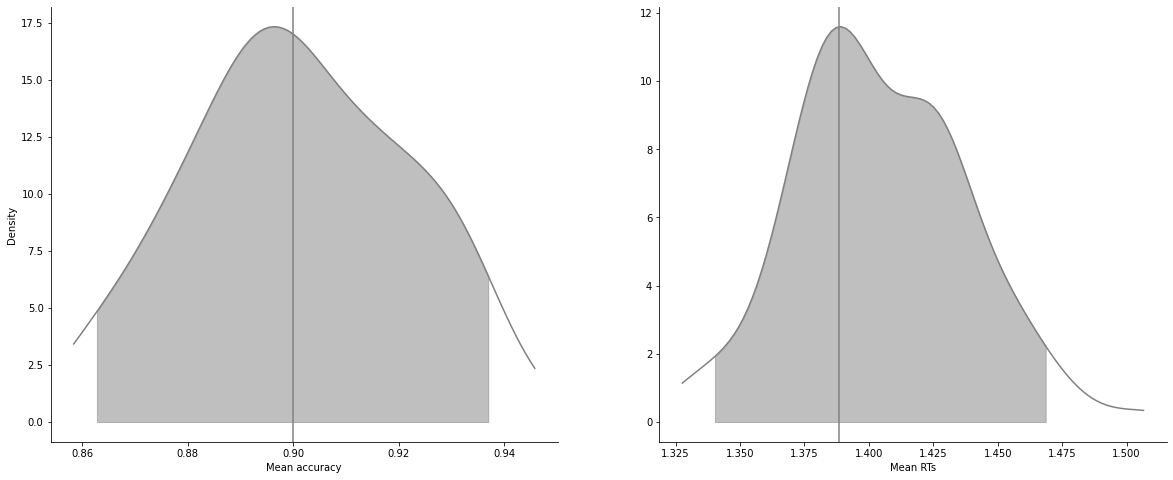

In [15]:
g = model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI')

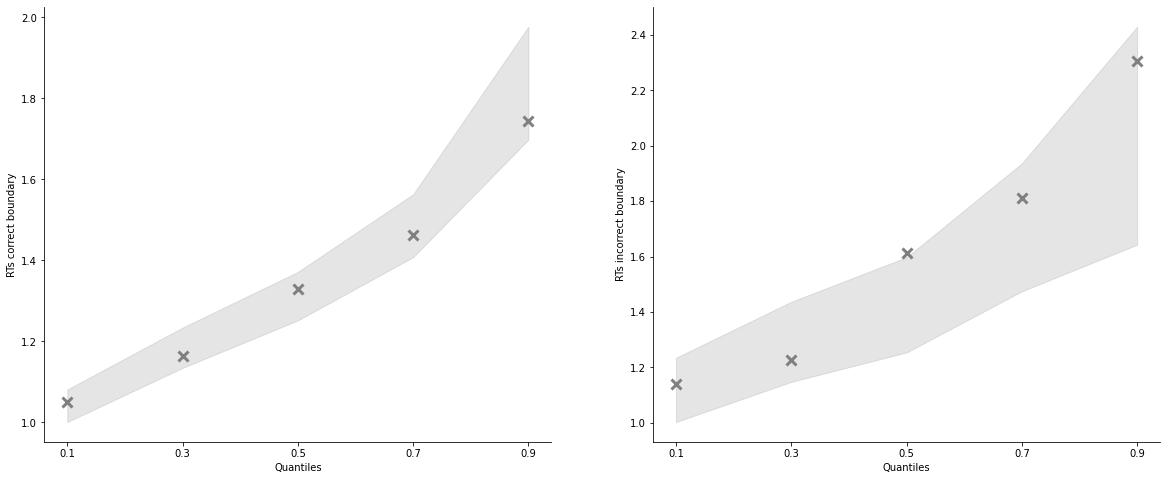

In [16]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [17]:
import numpy as np

In [18]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [19]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,feedback_type,accuracy_rescale,choice_pair,block_bins
0,0,7,1,1,56,40,4,2,1,2.094658,0,0,2,BD,1
1,1,7,1,2,54,40,4,2,2,1.739800,0,0,2,BD,1
2,2,7,1,3,56,50,4,3,2,1.127668,1,0,1,CD,1
3,3,7,1,4,50,46,3,1,1,1.767624,0,0,2,AC,1
4,4,7,1,5,54,30,3,1,2,1.732556,1,0,1,AC,1


In [20]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.90  1.539851  1.754974   
                        2                0.80  1.561085  0.431330   
                        3                0.75  1.579220  0.686238   
                        4                0.85  1.576926  1.319148   
                        5                1.00  1.641430  1.103052   
...                                       ...       ...       ...   
3           CD          96               0.90  1.391822  1.113241   
                        97               0.95  1.516387  1.093106   
                        98               0.90  1.467814  1.527205   
                        99               0.95  1.319599  2.476766   
                        100              0.80  1.308900  1.097723   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.844951             1.358151   
                        2                    1.412235             1.170035   
                        3                    1.575720             1.084320   
                        4                    1.593976             1.291576   
                        5                         NaN             1.331130   
...                                               ...                  ...   
3           CD          96                   1.261772             1.218472   
                        97                   1.127537             1.374337   
                        98                   1.381914             1.282014   
                        99                   1.061849             1.165049   
                        100                  1.205050             1.198450   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    2.115551             1.489051   
                        2                    1.795535             1.556035   
                        3                    1.687720             1.322720   
                        4                    1.786376             1.435376   
                        5                         NaN             1.680030   
...                                               ...                  ...   
3           CD          96                   1.418372             1.261872   
                        97                   1.127537             1.449537   
                        98                   1.461514             1.420014   
                        99                   1.061849             1.254849   
                        100                  1.219450             1.289450   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1           AB          1                    2.386151             1.587151  
                        2                    2.171735             1.713535  
                        3                    1.718120             2.032520  
                        4                    1.816776             1.579576  
                        5                         NaN             1.841330  
...                                               ...                  ...  
3           CD          96                   1.574972             1.435872  
                        97                   1.127537             1.661937  
                        98                   1.541114             1.582114  
                        99                   1.061849             1.339649  
                        100                  1.236950             1.424450  

[1200 rows x 9 columns]

In [21]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.700000  1.602418  1.030999               1.403251   
           2            0.733333  1.687902  1.692650               1.363135   
           3            0.700000  1.470853  0.839977               1.088720   
           4            0.633333  1.611043  1.089835               1.263376   
           5            0.866667  1.599997  1.377816               1.865530   
...                          ...       ...       ...                    ...   
8          96           0.966667  1.422672  0.609169               1.974872   
           97           0.933333  1.298904  1.893853               1.296437   
           98           0.766667  1.482714  0.801291               1.140314   
           99           0.966667  1.278949  1.771068               1.484849   
           100          0.933333  1.290583  0.967885               1.169550   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.379051               1.592051   
           2                  1.235835               1.598035   
           3                  1.290720               1.171720   
           4                  1.378576               1.356376   
           5                  1.212530               1.956530   
...                                ...                    ...   
8          96                 1.151472               1.974872   
           97                 1.174937               1.417037   
           98                 1.213114               1.433514   
           99                 1.148649               1.484849   
           100                1.150050               1.184950   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.498051               1.801051   
           2                  1.542035               1.653835   
           3                  1.548720               1.344120   
           4                  1.470376               1.518376   
           5                  1.389530               2.026130   
...                                ...                    ...   
8          96                 1.320872               1.974872   
           97                 1.252037               1.537637   
           98                 1.372514               1.936114   
           99                 1.165849               1.484849   
           100                1.240450               1.200350   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.647051  
           2                  1.699135  
           3                  1.680720  
           4                  1.772576  
           5                  1.564030  
...                                ...  
8          96                 1.525272  
           97                 1.323237  
           98                 1.565714  
           99                 1.250249  
           100                1.391450  

[800 rows x 9 columns]

In [22]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,feedback_type,accuracy_rescale,choice_pair,block_bins
0,0,7,1,1,56,40,4,2,1,2.094658,0,0,2,BD,1
1,1,7,1,2,54,40,4,2,2,1.739800,0,0,2,BD,1
2,2,7,1,3,56,50,4,3,2,1.127668,1,0,1,CD,1
3,3,7,1,4,50,46,3,1,1,1.767624,0,0,2,AC,1
4,4,7,1,5,54,30,3,1,2,1.732556,1,0,1,AC,1


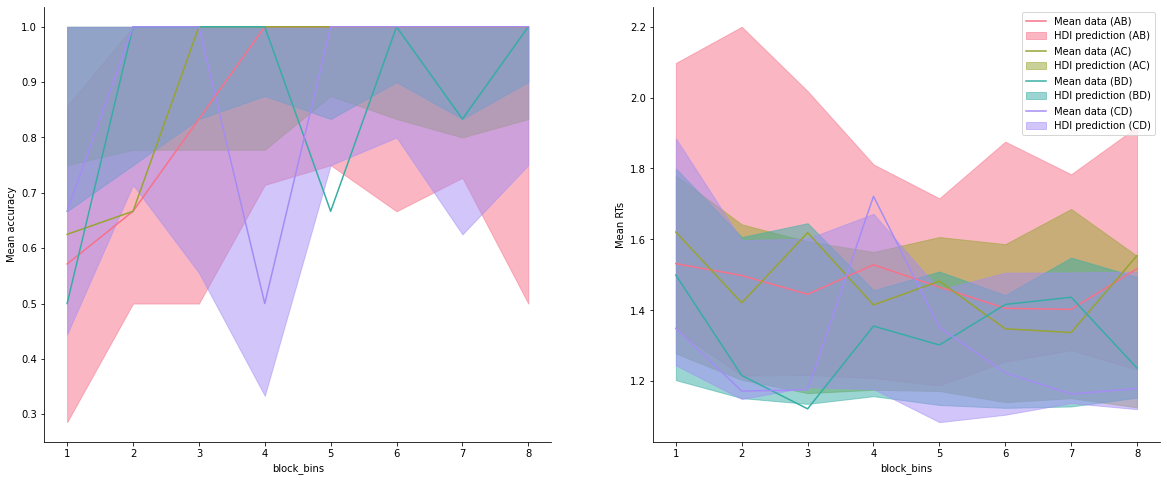

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

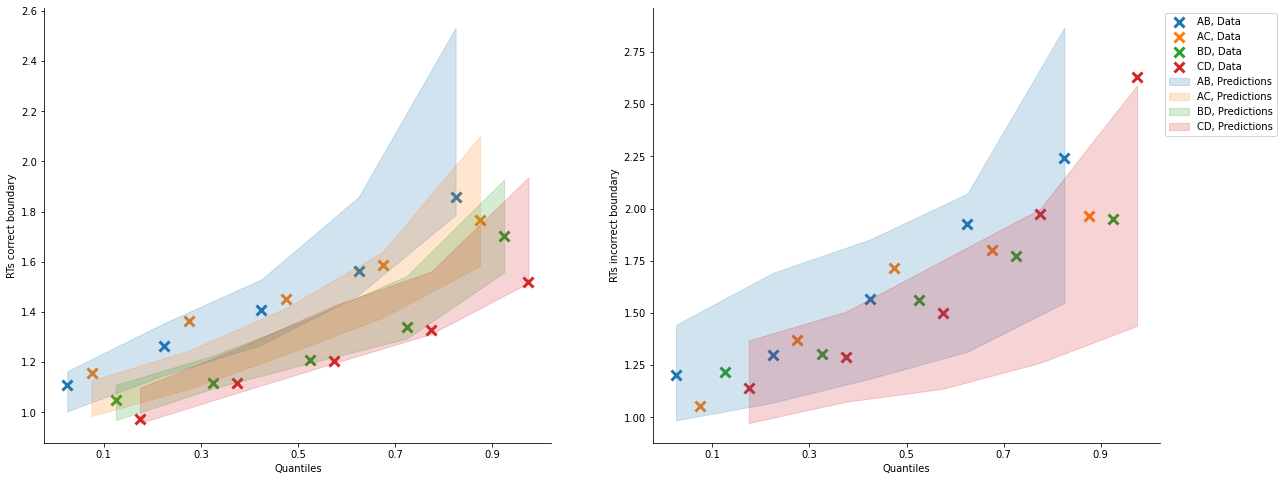

In [24]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=100,
                                                        grouping_var='choice_pair',
                                                        kind='shades',
                                                        quantiles=[.1, .3, .5, .7, .9]);

In [25]:
import seaborn as sns

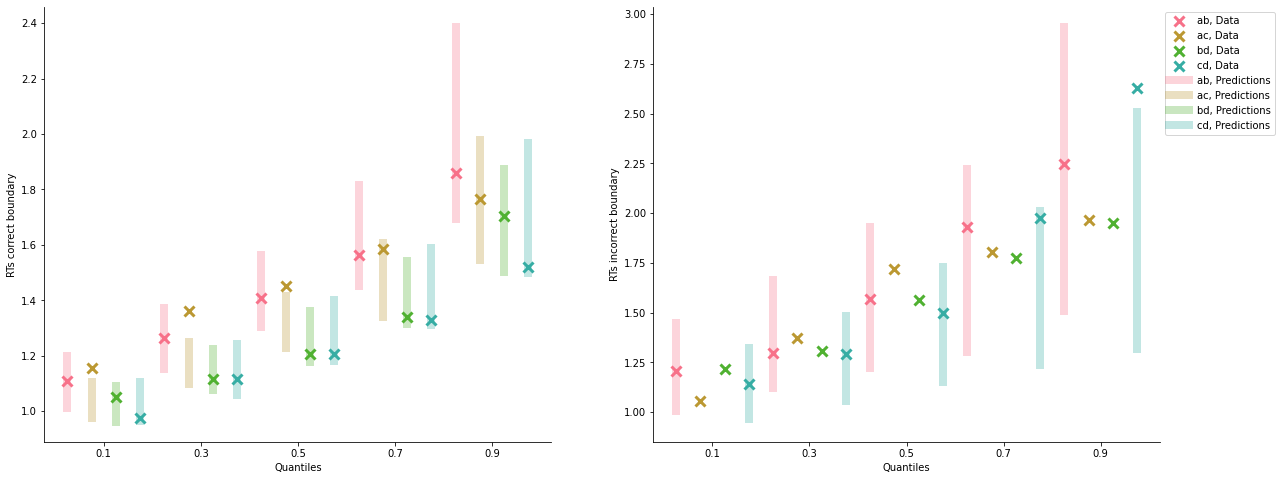

In [26]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=300,
    grouping_var='choice_pair',
    palette = sns.color_palette('husl'),
    intervals_kws={'alpha': .3, 'lw':8},
    hue_order=['AB', 'AC', 'BD', 'CD'],
    hue_labels=['ab', 'ac', 'bd', 'cd']);

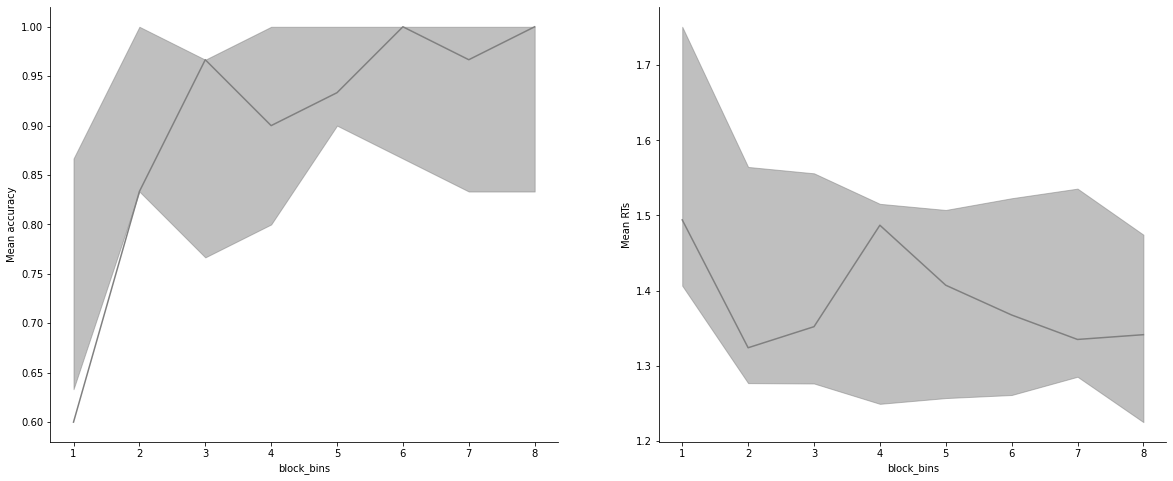

In [27]:
model_fit.plot_mean_grouped_posterior_predictives(
    grouping_vars=['block_bins'],
    n_posterior_predictives=100,
    figsize=(20,8));